In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import accuracy_score

# Load and preprocess the data
train_data = pd.read_csv("datasets/train/train_text_seq.csv")
val_data = pd.read_csv("datasets/valid/valid_text_seq.csv")
test_data = pd.read_csv("datasets/test/test_text_seq.csv")

def preprocess_data(data):
    # Convert input strings to numerical arrays
    X = np.array([list(map(int, list(s))) for s in data['input_str']])
    return X

# Prepare data
X_train = preprocess_data(train_data)
y_train = train_data['label'].values
X_val = preprocess_data(val_data)
y_val = val_data['label'].values
X_test = preprocess_data(test_data)

# Padding sequences to ensure uniform length (use the max length of sequences)
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = max([len(seq) for seq in X_train])
X_train = pad_sequences(X_train, maxlen=max_len, padding='post')
X_val = pad_sequences(X_val, maxlen=max_len, padding='post')
X_test = pad_sequences(X_test, maxlen=max_len, padding='post')

# Convert labels to one-hot encoding
num_classes = len(np.unique(y_train))
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_val = tf.keras.utils.to_categorical(y_val, num_classes)

# Define the BiLSTM model
model = Sequential([
    Embedding(input_dim=10, output_dim=64, input_length=max_len),  # Embedding layer
    Bidirectional(LSTM(128, return_sequences=True)),
    BatchNormalization(),
    Dropout(0.4),
    Bidirectional(LSTM(64)),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

# Train the model
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=50,
                    batch_size=32,
                    callbacks=[early_stopping, reduce_lr],
                    verbose=1)

# Evaluate on validation set
val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

# Predict on the test set
y_test_pred = model.predict(X_test)
y_test_pred_labels = np.argmax(y_test_pred, axis=1)

Epoch 1/50


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


222/222 ━━━━━━━━━━━━━━━━━━━━ 21s 88ms/step - accuracy: 0.5502 - loss: 0.6895 - val_accuracy: 0.5399 - val_loss: 0.6874 - learning_rate: 0.0010
Epoch 2/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 22s 101ms/step - accuracy: 0.6221 - loss: 0.6515 - val_accuracy: 0.6524 - val_loss: 0.6316 - learning_rate: 0.0010
Epoch 3/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 23s 102ms/step - accuracy: 0.6465 - loss: 0.6269 - val_accuracy: 0.6769 - val_loss: 0.6096 - learning_rate: 0.0010
Epoch 4/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 22s 101ms/step - accuracy: 0.6492 - loss: 0.6189 - val_accuracy: 0.6646 - val_loss: 0.6271 - learning_rate: 0.0010
Epoch 5/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 23s 104ms/step - accuracy: 0.6728 - loss: 0.6004 - val_accuracy: 0.6135 - val_loss: 0.6301 - learning_rate: 0.0010
Epoch 6/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 22s 101ms/step - accuracy: 0.6792 - loss: 0.5999 - val_accuracy: 0.6810 - val_loss: 0.6011 - learning_rate: 0.0010
Epoch 7/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 23s 102ms/step - accuracy: 0.6888 - loss: 

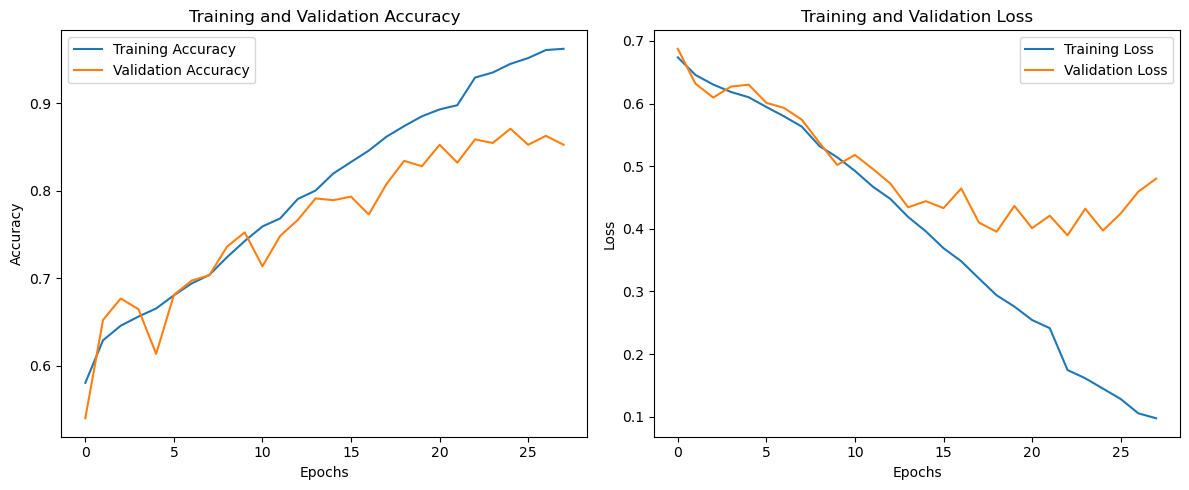

70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step

Predicted values for the test set:
[1 1 1 ... 0 0 1]


In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

test_data = pd.read_csv("datasets/test/test_text_seq.csv")
X_test = preprocess_data(test_data)
X_test = pad_sequences(X_test, maxlen=max_len, padding='post')

y_test_pred = model.predict(X_test)
y_test_pred_labels = np.argmax(y_test_pred, axis=1)

# Print predicted values
print("\nPredicted values for the test set:")
print(y_test_pred_labels)
